<a href="https://colab.research.google.com/github/AbiaAlvesReis/Projeto-IA-2022-01/blob/main/AMMS_aleatoriedade_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
!pip install dash
import dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [242]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go # criará de fato os gráficos
from plotly.offline import plot, iplot
import cufflinks as cf # para conectar o plotly ao pandas
cf.go_offline()
plotly.offline.init_notebook_mode(connected = True)
import os
import datetime
import pandas as pd
import numpy as np
# visualização de matplot
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import math
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [243]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [244]:
pio.renderers.default = 'colab'

In [245]:
print("Pandas version: ()", format(pd.__version__))
print("Numpy version: ()", format(np.__version__))
print("Seaborn version: ()", format(sns.__version__))

Pandas version: () 1.3.5
Numpy version: () 1.21.6
Seaborn version: () 0.11.2


Conectando o arquivo

In [246]:
megadf = pd.read_excel('/content/drive/MyDrive/2022/IA - projeto/dados brutos mega sena/loteriascaixa_at.xlsx', parse_dates=True, index_col=1)

In [247]:
# Número de linhas e de colunas
megadf.shape

(2485, 7)

In [248]:
megadf.dropna(inplace=True)

In [249]:
megadf

,lottery,ball_01,ball_02,ball_03,ball_04,ball_05,ball_06
date,,,,,,,
1996-03-11,1.0,41.0,5.0,4.0,52.0,30.0,33.0
1996-03-18,2.0,9.0,39.0,37.0,49.0,43.0,41.0
1996-03-25,3.0,36.0,30.0,10.0,11.0,29.0,47.0
1996-04-01,4.0,6.0,59.0,42.0,27.0,1.0,5.0
1996-04-08,5.0,1.0,19.0,46.0,6.0,16.0,2.0
...,...,...,...,...,...,...,...
2022-05-14,2481.0,1.0,37.0,36.0,21.0,8.0,27.0
2022-05-18,2482.0,32.0,1.0,57.0,44.0,35.0,45.0
2022-05-21,2483.0,54.0,49.0,34.0,38.0,40.0,20.0


Deletar colunas desnessaeraias

In [250]:
megadf.drop('lottery', inplace=True, axis=1)

In [251]:
megadf

,ball_01,ball_02,ball_03,ball_04,ball_05,ball_06
date,,,,,,
1996-03-11,41.0,5.0,4.0,52.0,30.0,33.0
1996-03-18,9.0,39.0,37.0,49.0,43.0,41.0
1996-03-25,36.0,30.0,10.0,11.0,29.0,47.0
1996-04-01,6.0,59.0,42.0,27.0,1.0,5.0
1996-04-08,1.0,19.0,46.0,6.0,16.0,2.0
...,...,...,...,...,...,...
2022-05-14,1.0,37.0,36.0,21.0,8.0,27.0
2022-05-18,32.0,1.0,57.0,44.0,35.0,45.0
2022-05-21,54.0,49.0,34.0,38.0,40.0,20.0


Verificando se há dados ausentes

specify the name of the sisth ordem column, because it differs between each lottey

In [252]:
megadf.head(5)

,ball_01,ball_02,ball_03,ball_04,ball_05,ball_06
date,,,,,,
1996-03-11,41.0,5.0,4.0,52.0,30.0,33.0
1996-03-18,9.0,39.0,37.0,49.0,43.0,41.0
1996-03-25,36.0,30.0,10.0,11.0,29.0,47.0
1996-04-01,6.0,59.0,42.0,27.0,1.0,5.0
1996-04-08,1.0,19.0,46.0,6.0,16.0,2.0


Check data type & See if any data is missing

In [253]:
print(megadf.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2485 entries, 1996-03-11 to 2022-05-28
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ball_01  2485 non-null   float64
 1   ball_02  2485 non-null   float64
 2   ball_03  2485 non-null   float64
 3   ball_04  2485 non-null   float64
 4   ball_05  2485 non-null   float64
 5   ball_06  2485 non-null   float64
dtypes: float64(6)
memory usage: 135.9 KB
None


Check for missing data, correct tyupers...

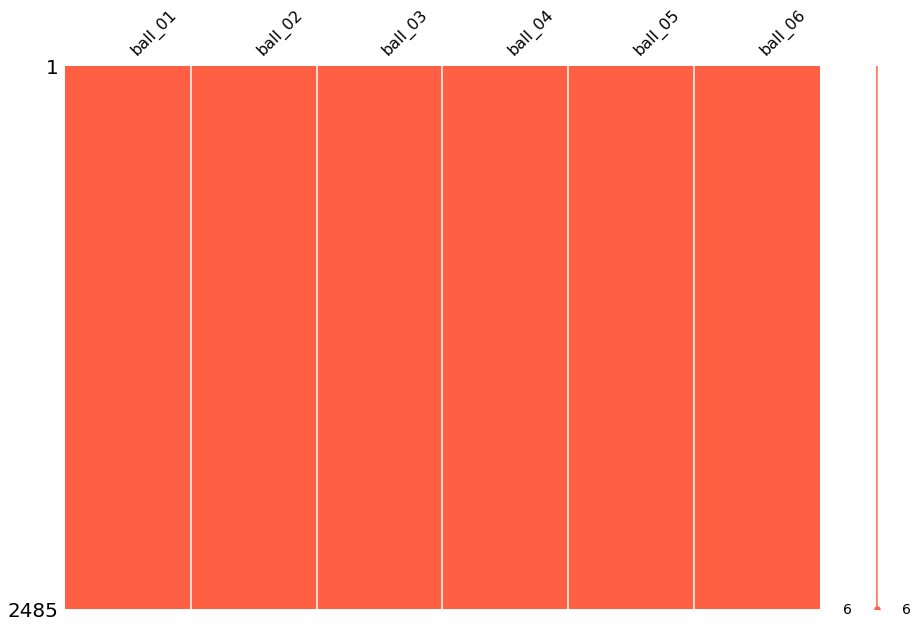

In [254]:
msno.matrix(megadf, figsize = (15,10), color=(1, 0.38, 0.27))

In [255]:
#data=data.sort_value(by=['date'], ascending=False)
megadf = megadf.sort_values(by=["date"], ascending=False)

Plot

In [256]:
#ax = megadf.plot(kind='line', figsize=(20,16))
#plt.show()
megadf.iplot()

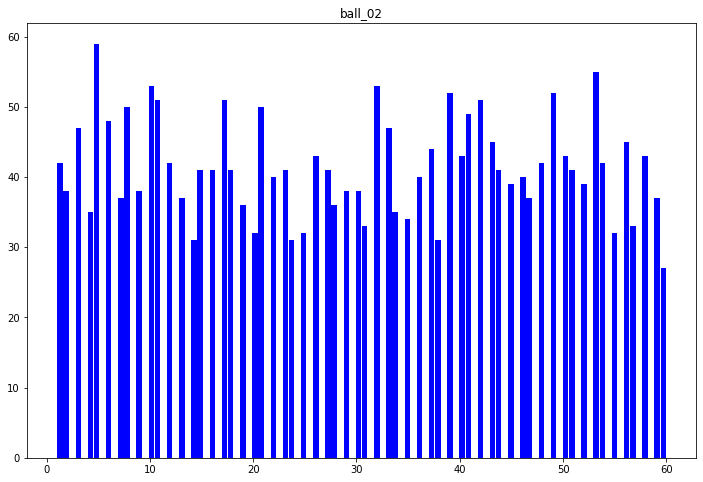

In [257]:
ax = megadf.hist(column='ball_02',bins = 100, grid=False, figsize=(12,8), color='blue', zorder=2, rwidth=0.9)

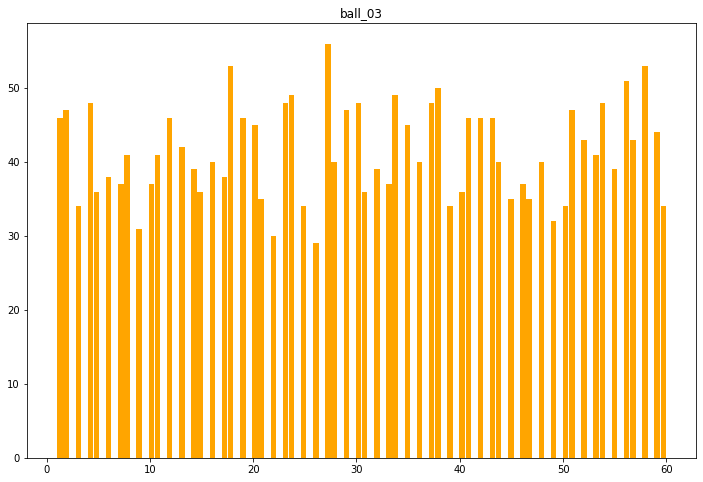

In [258]:
ax = megadf.hist(column='ball_03',bins = 100, grid=False, figsize=(12,8), color='orange', zorder=2, rwidth=0.9)

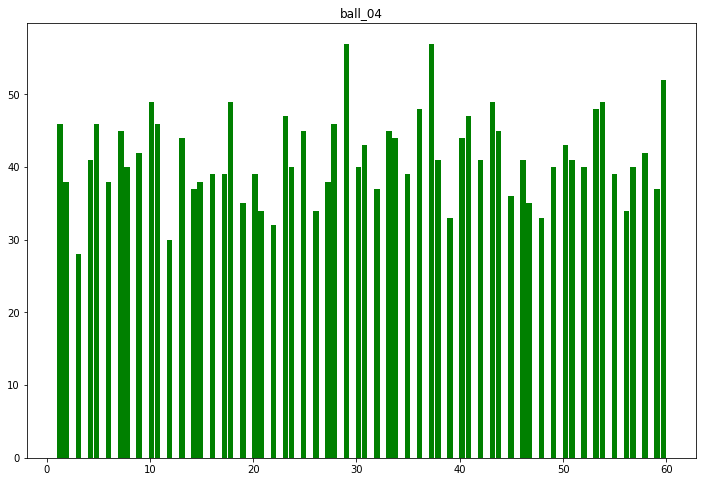

In [259]:
ax = megadf.hist(column='ball_04',bins = 100, grid=False, figsize=(12,8), color='green', zorder=2, rwidth=0.9)


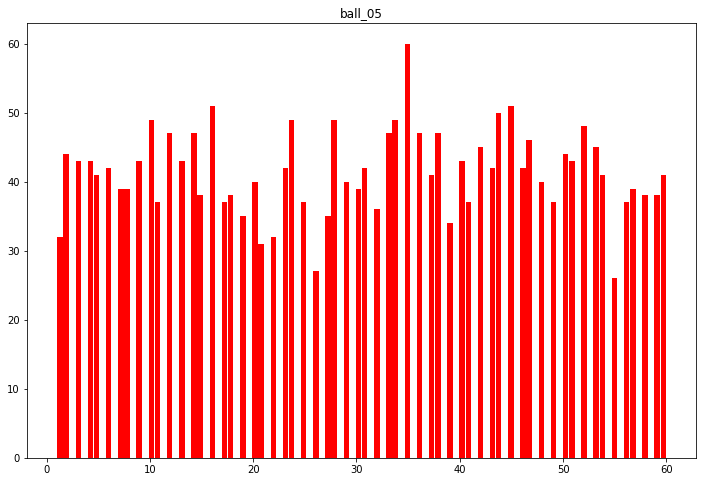

In [260]:
ax = megadf.hist(column='ball_05',bins = 100, grid=False, figsize=(12,8), color='red', zorder=2, rwidth=0.9)


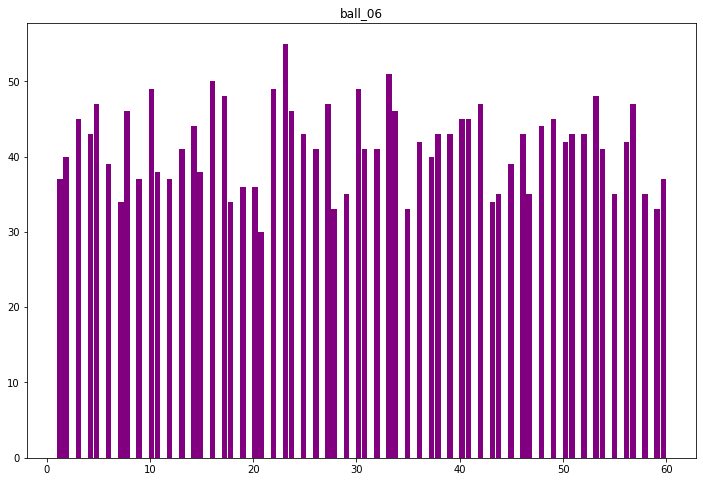

In [261]:
ax = megadf.hist(column='ball_06',bins = 100, grid=False, figsize=(12,8), color='purple', zorder=2, rwidth=0.9)



calculate the avarage and standart deviations for each drawing number

In [262]:
ball_01_mean = [np.mean(megadf["ball_01"])] * len(megadf)
ball_02_mean = [np.mean(megadf["ball_02"])] * len(megadf)
ball_03_mean = [np.mean(megadf["ball_03"])] * len(megadf)
ball_04_mean = [np.mean(megadf["ball_04"])] * len(megadf)
ball_05_mean = [np.mean(megadf["ball_05"])] * len(megadf)
ball_06_mean = [np.mean(megadf["ball_06"])] * len(megadf)

In [263]:
ball_01_std = [np.std(megadf["ball_01"]) + np.mean(megadf["ball_01"])] * len(megadf)
ball_12_std = [np.mean(megadf["ball_01"]) - np.mean(megadf["ball_01"])] * len(megadf)
ball_02_std = [np.std(megadf["ball_02"]) + np.mean(megadf["ball_02"])] * len(megadf)
ball_22_std = [np.mean(megadf["ball_02"]) - np.mean(megadf["ball_02"])] * len(megadf)
ball_03_std = [np.std(megadf["ball_03"]) + np.mean(megadf["ball_03"])] * len(megadf)
ball_32_std = [np.mean(megadf["ball_03"]) - np.mean(megadf["ball_03"])] * len(megadf)
ball_04_std = [np.std(megadf["ball_04"]) + np.mean(megadf["ball_04"])] * len(megadf)
ball_42_std = [np.mean(megadf["ball_04"]) - np.mean(megadf["ball_04"])] * len(megadf)
ball_05_std = [np.std(megadf["ball_05"]) + np.mean(megadf["ball_05"])] * len(megadf)
ball_52_std = [np.mean(megadf["ball_05"]) - np.mean(megadf["ball_05"])] * len(megadf)
ball_06_std = [np.std(megadf["ball_06"]) + np.mean(megadf["ball_06"])] * len(megadf)
ball_60_std = [np.mean(megadf["ball_06"]) - np.mean(megadf["ball_06"])] * len(megadf)





In [264]:
plot_megadf = megadf.reset_index()

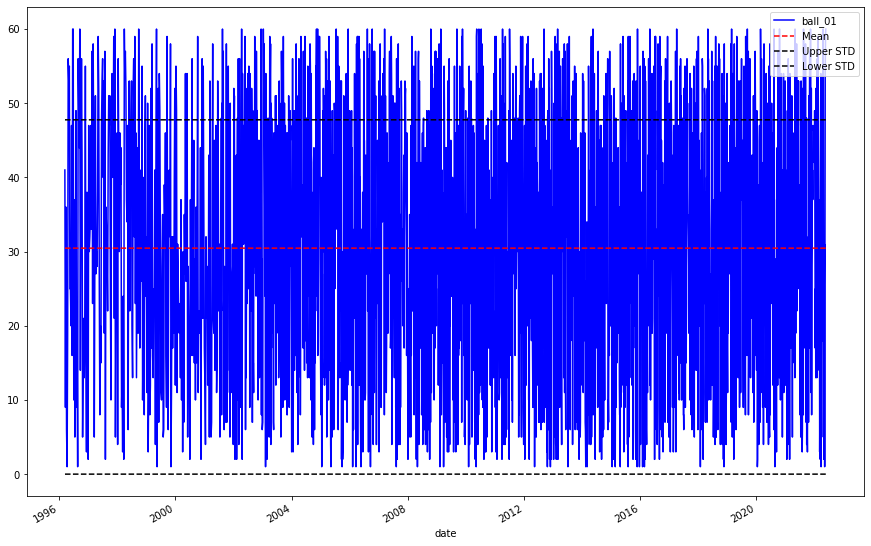

In [265]:
ax = plot_megadf.plot(x="date", y='ball_01', kind="line", color= "blue", figsize=(15,10))
mean_line = ax.plot(plot_megadf['date'],ball_01_mean, label= 'Mean', linestyle='--', color="red")
std_line = ax.plot(plot_megadf['date'],ball_01_std, label= 'Upper STD', linestyle='--', color='black')
std_line = ax.plot(plot_megadf['date'],ball_12_std, label= 'Lower STD', linestyle='--', color='black')
legend = ax.legend(loc='upper right')
plt.show()


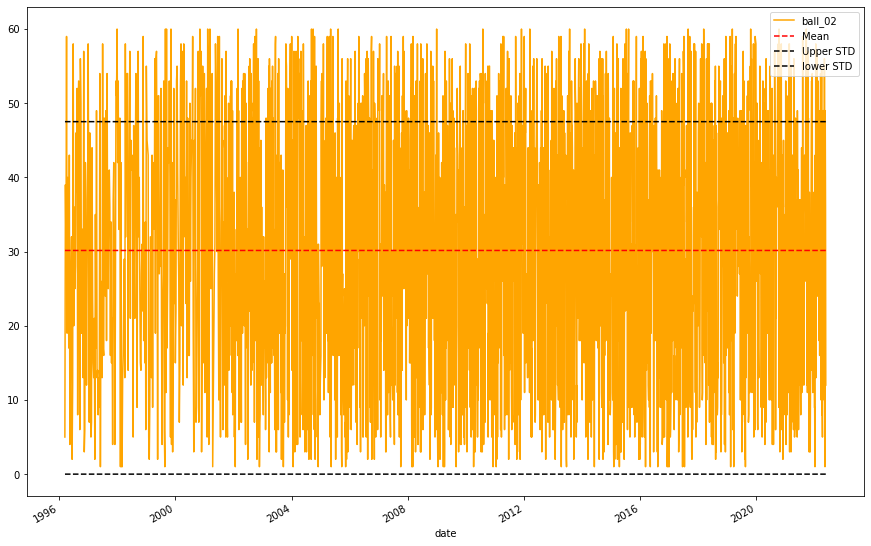

In [266]:
ax = plot_megadf.plot(x="date", y='ball_02', kind="line", color= "orange", figsize=(15,10))
mean_line = ax.plot(plot_megadf['date'],ball_02_mean, label= 'Mean', linestyle='--', color="red")
std_line = ax.plot(plot_megadf['date'],ball_02_std, label= 'Upper STD', linestyle='--', color='black')
std_line = ax.plot(plot_megadf['date'],ball_22_std, label= 'lower STD', linestyle='--', color='black')
legend = ax.legend(loc='upper right')
plt.show()


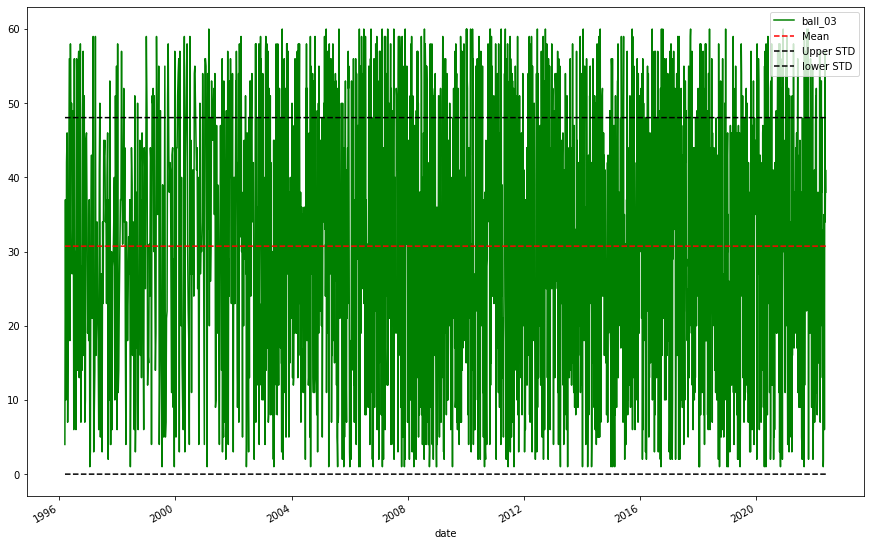

In [267]:
ax = plot_megadf.plot(x="date", y='ball_03', kind="line", color= "green", figsize=(15,10))
mean_line = ax.plot(plot_megadf['date'],ball_03_mean, label= 'Mean', linestyle='--', color="red")
std_line = ax.plot(plot_megadf['date'],ball_03_std, label= 'Upper STD', linestyle='--', color='black')
std_line = ax.plot(plot_megadf['date'],ball_32_std, label= 'lower STD', linestyle='--', color='black')
legend = ax.legend(loc='upper right')
plt.show()


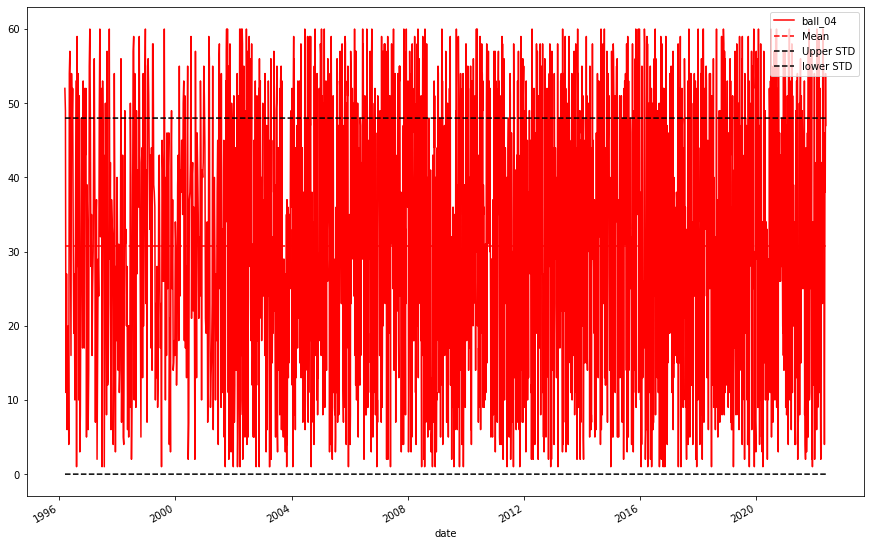

In [268]:
ax = plot_megadf.plot(x="date", y='ball_04', kind="line", color= "red", figsize=(15,10))
mean_line = ax.plot(plot_megadf['date'],ball_04_mean, label= 'Mean', linestyle='--', color="red")
std_line = ax.plot(plot_megadf['date'],ball_04_std, label= 'Upper STD', linestyle='--', color='black')
std_line = ax.plot(plot_megadf['date'],ball_42_std, label= 'lower STD', linestyle='--', color='black')
legend = ax.legend(loc='upper right')
plt.show()

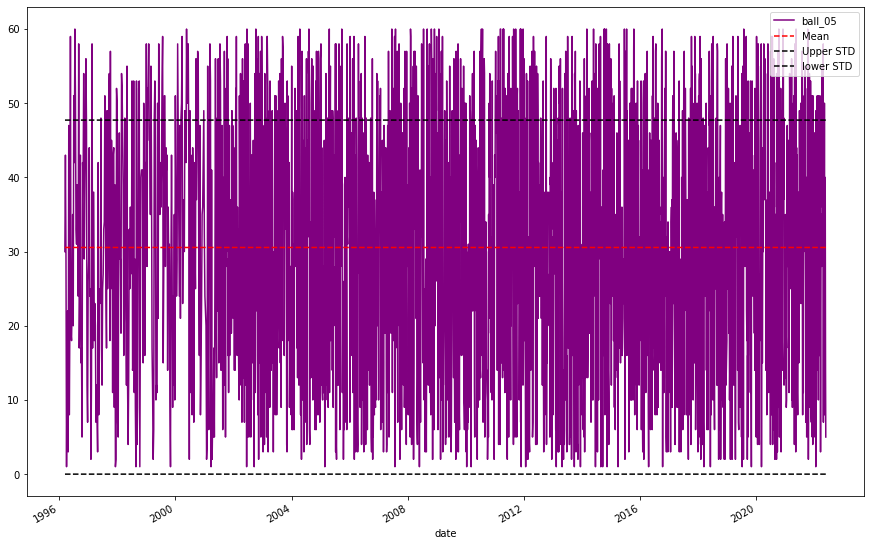

In [269]:
ax = plot_megadf.plot(x="date", y='ball_05', kind="line", color= "purple", figsize=(15,10))
mean_line = ax.plot(plot_megadf['date'],ball_05_mean, label= 'Mean', linestyle='--', color="red")
std_line = ax.plot(plot_megadf['date'],ball_05_std, label= 'Upper STD', linestyle='--', color='black')
std_line = ax.plot(plot_megadf['date'],ball_52_std, label= 'lower STD', linestyle='--', color='black')
legend = ax.legend(loc='upper right')
plt.show()

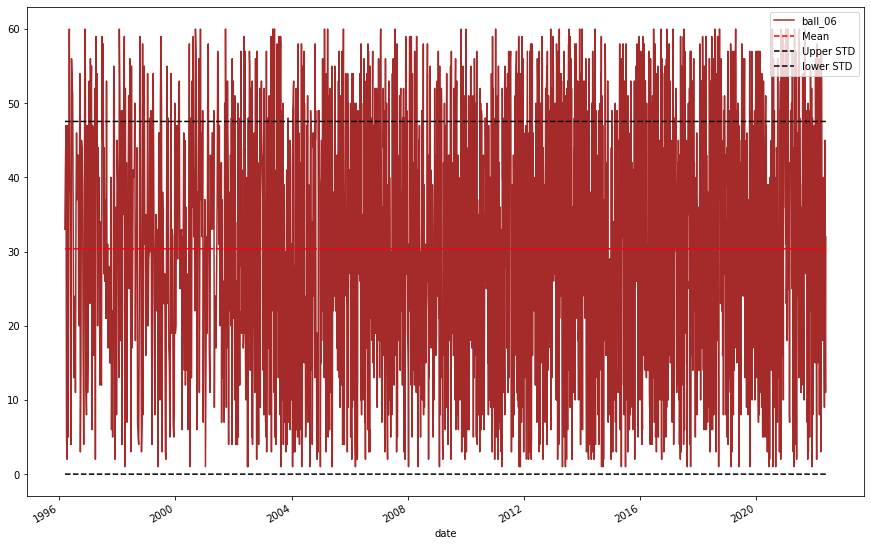

In [270]:
ax = plot_megadf.plot(x="date", y='ball_06', kind="line", color= "brown", figsize=(15,10))
mean_line = ax.plot(plot_megadf['date'],ball_06_mean, label= 'Mean', linestyle='--', color="red")
std_line = ax.plot(plot_megadf['date'],ball_06_std, label= 'Upper STD', linestyle='--', color='black')
std_line = ax.plot(plot_megadf['date'],ball_60_std, label= 'lower STD', linestyle='--', color='black')
legend = ax.legend(loc='upper right')
plt.show()

In [271]:
megadf.describe()

,ball_01,ball_02,ball_03,ball_04,ball_05,ball_06
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.00000,2485.000000
mean,30.465191,30.151710,30.734406,30.752918,30.55493,30.372233
std,17.302279,17.367138,17.328347,17.248985,17.17453,17.173908
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,16.000000,15.000000,16.000000,16.000000,15.00000,16.000000
50%,30.000000,31.000000,31.000000,31.000000,31.00000,30.000000
75%,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
max,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000


Binomial probability distribuition of Winning

[0 1 2 3 4]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



array([9.17289251e-01, 7.97642827e-02, 2.89001024e-03, 5.58456085e-05,
       6.07017484e-07])

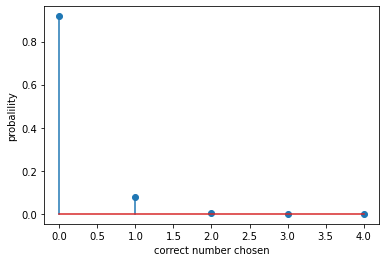

In [272]:
#totalnumbersfor each game 
rvn = 70
total = rvn
from scipy.stats import binom
npicks = np.asarray(np.linspace(0,4,5),dtype='int')

print(npicks)
pwinner = binom.pmf(k=npicks, n=6, p=1/total)
plt.stem(npicks, pwinner)
plt.xlabel('correct number chosen')
plt.ylabel('probalility')
(pwinner)




In [273]:
#calculete the average and standard deviations for each drawing numbers
period = 60

ball_01_rolling = megadf["ball_01"].rolling(period).mean()
ball_02_rolling = megadf["ball_02"].rolling(period).mean()
ball_03_rolling = megadf["ball_03"].rolling(period).mean()
ball_04_rolling = megadf["ball_04"].rolling(period).mean()
ball_05_rolling = megadf["ball_05"].rolling(period).mean()
ball_06_rolling = megadf["ball_06"].rolling(period).mean()

In [274]:
ball_01_rolling.dropna(inplace= True)
ball_02_rolling.dropna(inplace= True)
ball_03_rolling.dropna(inplace= True)
ball_04_rolling.dropna(inplace= True)
ball_05_rolling.dropna(inplace= True)
ball_06_rolling.dropna(inplace= True)


In [275]:
ball_01_rolling

date
2021-11-06    33.300000
2021-11-03    33.066667
2021-10-30    32.366667
2021-10-27    32.316667
2021-10-23    31.900000
                ...    
1996-04-08    32.033333
1996-04-01    32.000000
1996-03-25    32.166667
1996-03-18    31.450000
1996-03-11    31.150000
Name: ball_01, Length: 2426, dtype: float64

Rolling Average- 60 day

In [276]:
print(f"Play : {math.floor(ball_01_rolling[0])} - {math.floor(ball_02_rolling[0])} - {math.floor(ball_03_rolling[0])} - {math.floor(ball_04_rolling[0])} - {math.floor(ball_05_rolling[0])} - {math.floor(ball_06_rolling[0])}")


Play : 33 - 31 - 28 - 30 - 29 - 32


In [277]:
print(f"Play : {math.floor(ball_02_rolling[0])} - {math.floor(ball_03_rolling[0])} - {math.floor(ball_04_rolling[0])} - {math.floor(ball_05_rolling[0])} - {math.floor(ball_06_rolling[0])} - {math.floor(ball_01_rolling[0])}")


Play : 31 - 28 - 30 - 29 - 32 - 33


In [278]:
print(f"Play : {math.floor(ball_03_rolling[0])} - {math.floor(ball_04_rolling[0])} - {math.floor(ball_05_rolling[0])} - {math.floor(ball_06_rolling[0])} - {math.floor(ball_01_rolling[0])} - {math.floor(ball_02_rolling[0])} ")


Play : 28 - 30 - 29 - 32 - 33 - 31 
